In [113]:
import sys
import os
import json
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from Tools import *
from Clusters import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [114]:
method = "k_means"
def train(name, data, decay = 10):
    model = K_Means(data, 5)
    centroids, labels = model()
    s_score = silhouette_score(data, labels, metric='euclidean')
    d_score = davies_bouldin_score(data, labels)
    print(s_score)
    print(d_score)
    print(centroids)
    print(labels)
    np.save(f'../Lib/Centroids/{name}_{method}.npy', centroids)
    np.save(f'../Lib/Labels/{name}_{method}.npy', labels)
    result = {
        "silhouette_score": s_score,
        "davies_bouldin_index": d_score
    }
    with open(f'../Lib/Score/{name}_{method}.json', 'w', encoding='utf-8') as rank:
        json.dump(result, rank, ensure_ascii=False, indent=4)
    return (centroids, labels), (s_score, d_score)

def visualize(name, index, data, centroids, labels, labels_name): 
    indexs = [item for item in range(len(labels_name)) if item != index]
    X_reduced = data
    final_centroids_reduced = centroids
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    axes[0].scatter(X_reduced[:, index], X_reduced[:, indexs[0]], c=labels, cmap='viridis', s=50)
    axes[0].scatter(final_centroids_reduced[:, index], final_centroids_reduced[:, indexs[0]], c='red', s=200, alpha=0.75, marker='X')
    axes[0].set_xlabel(f'{labels_name[index]}')
    axes[0].set_ylabel(f'{labels_name[indexs[0]]}')
    axes[0].set_title(f'{method} Clustering {labels_name[index]} & {labels_name[indexs[0]]}')

    axes[1].scatter(X_reduced[:, index], X_reduced[:, indexs[1]], c=labels, cmap='viridis', s=50)
    axes[1].scatter(final_centroids_reduced[:, index], final_centroids_reduced[:, indexs[1]], c='red', s=200, alpha=0.75, marker='X')
    axes[1].set_xlabel(f'{labels_name[index]}')
    axes[1].set_ylabel(f'{labels_name[indexs[1]]}')
    axes[1].set_title(f'{method} Clustering {labels_name[index]} & {labels_name[indexs[1]]}')

    fig.savefig(f'../Lib/Images/{name}_{labels_name[index]}_{method}.png', dpi=300, bbox_inches='tight')
    # Adjust layout to avoid overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# FoundationCourses

In [115]:
name_data = "FoundationCourses"
data, (n_samples, n_feature), labels_name = load_file_json(f"../Data/{name_data}.json")
(centroids_final, labels_final), (s_score, d_score) = train(f"{name_data}", data)

0.37417411896325353
1.074542401135123
[[7.40261114 6.52784815 4.05587398]
 [6.77130025 2.80026614 0.50353919]
 [8.77942405 8.00019953 6.10607854]
 [4.67901622 3.33223956 0.92836199]
 [8.03265813 5.64297828 0.        ]]
[3 2 2 0 1 2 2 4 2 0 0 1 0 2 2 2 3 2 1 2 0 1 1 0 0 1 0 1 2 0 0 2 1 0 2 0 0
 2 4 4 2 3 2 4 4 3 0 0 2 2 3 3 2 1 2 4 2 2 4 2 0 2 0 2 2 3 0 1 3 1 2 3 4 1
 0 4 4 2 3 2 0 2 2 2 0 0 3 2 2 2 0 3 2 2 1 1 0 2 1 0 4 0 0 2 0 2 4 4 4 1 2
 2 3 1 2 0 4 1 1 2 0 4 2 3 2 0 2 1 4 3 0 1 4 2 1 3 2 2 2 0 3 2 3 2 2 2 4 0
 2 1 2 2 2 3 2 0 0 2 0 2 2 2 0 1 2 2 0 3 0 0 1 2 0 2 0 0 4 0 2 2 3 2 0 3 0
 2 2 2 2 0 4 1 1 2 2 1 2 0 0 0 0 2 2 3 0 2 2 0 0 1 2 2 0 0 2 4 2 2 0 0 0 3
 0 2 2 1 2 3 0 2 4 0 0 3 2 2 2 3 3 0 4 2]


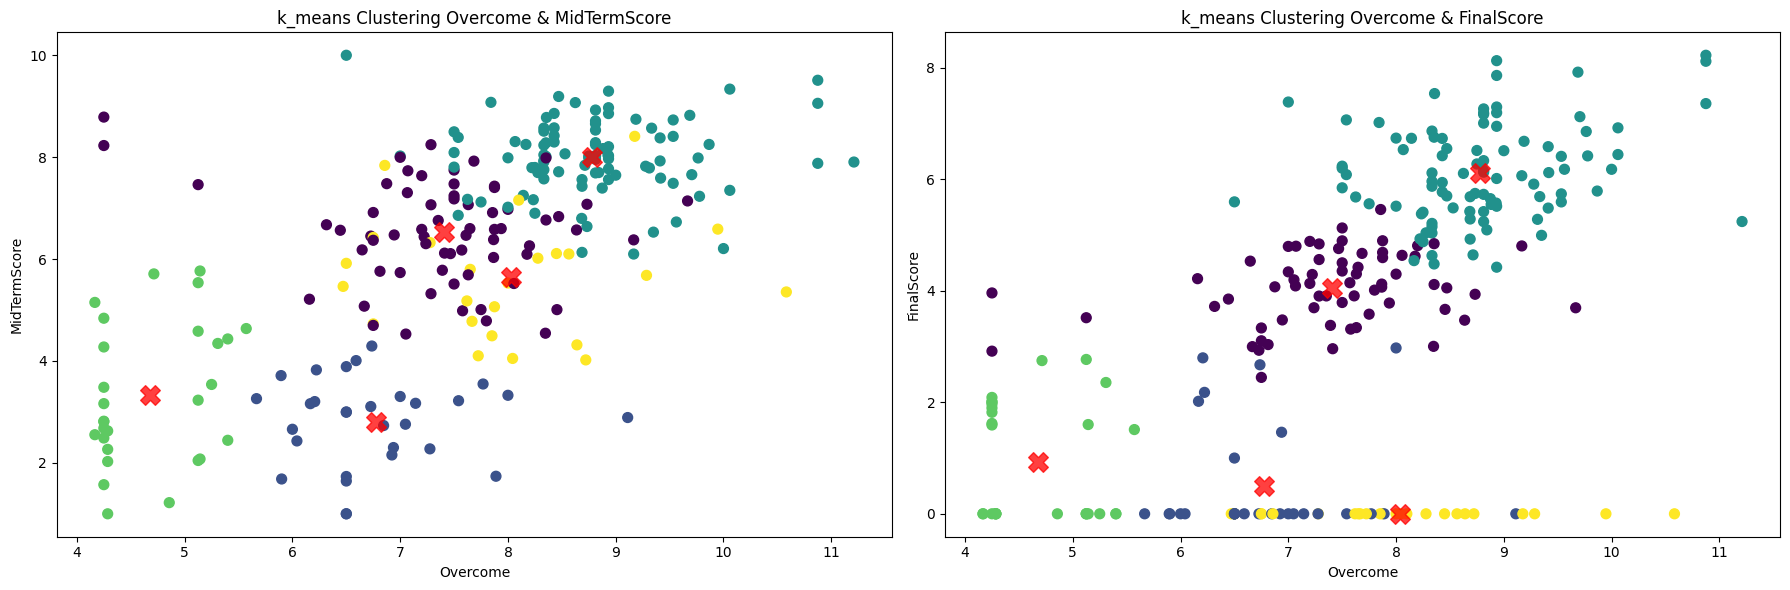

In [116]:
visualize(name_data, 0, data, centroids_final, labels_final, labels_name)

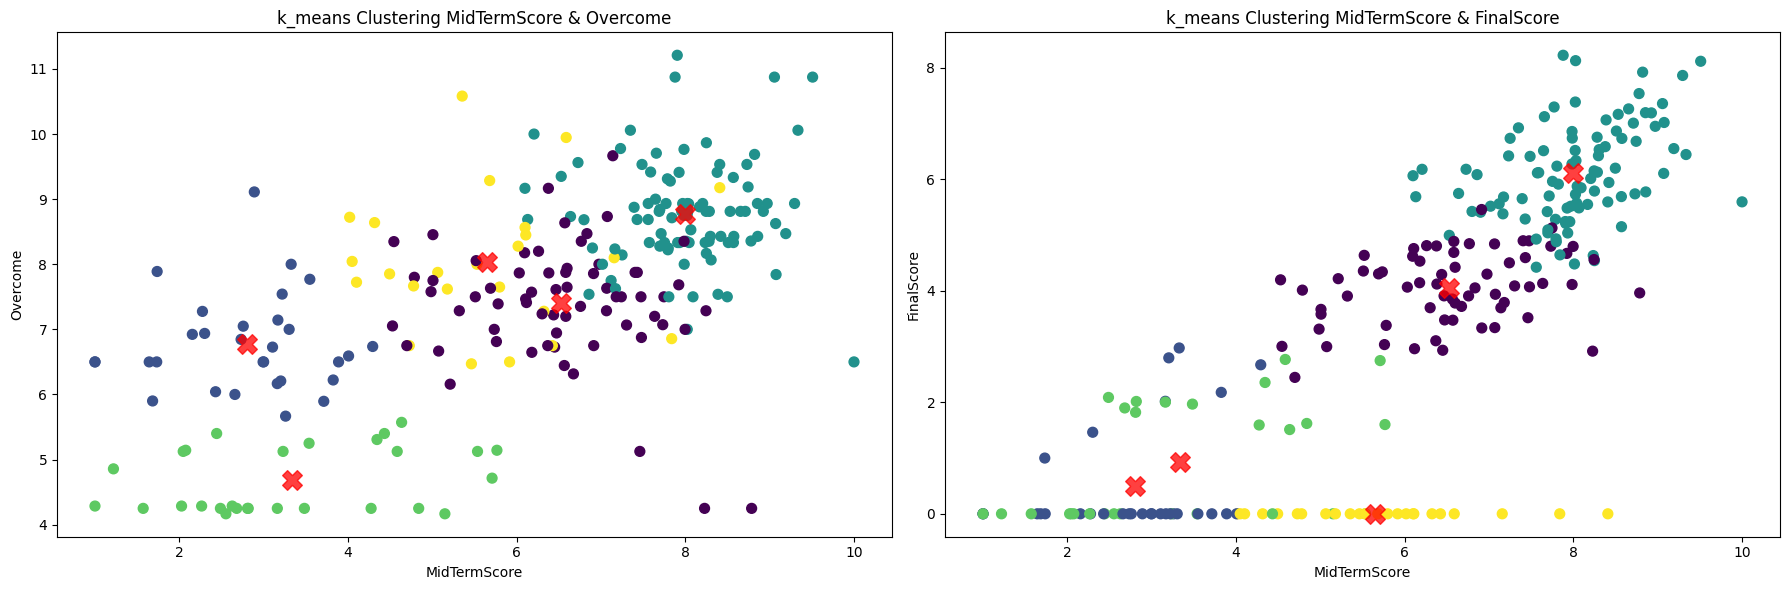

In [117]:
visualize(name_data, 1, data, centroids_final, labels_final, labels_name)

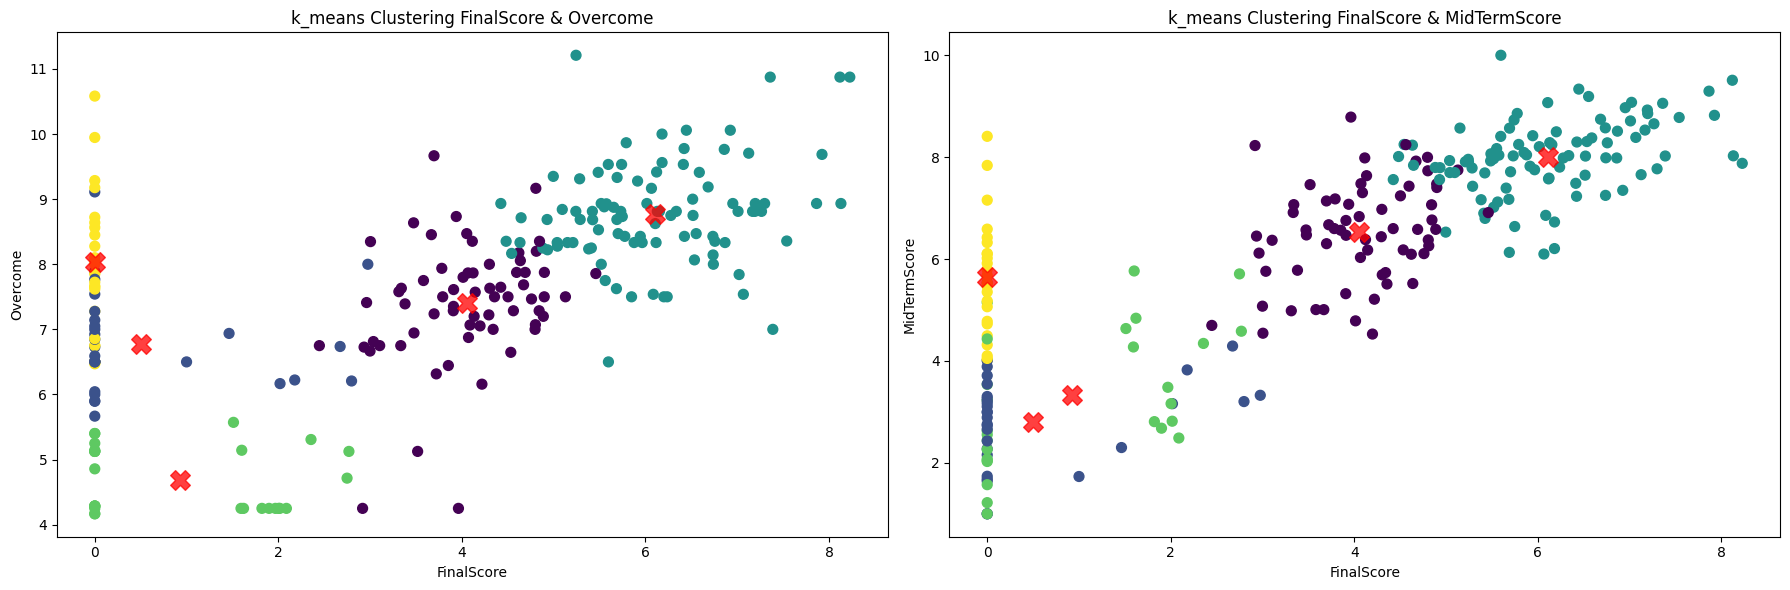

In [118]:
visualize(name_data, 2, data, centroids_final, labels_final, labels_name)

# GeneralCourses

In [119]:
name_data = "GeneralCourses"
data, (n_samples, n_feature), labels_name = load_file_json(f"../Data/{name_data}.json")
(centroids_final, labels_final), (s_score, d_score) = train(f"{name_data}", data)

0.4784808650654725
0.7298021284845595
[[6.56983912e+00 7.70435107e+00 6.51085830e+00]
 [4.27012235e+00 3.05952396e+00 1.77635684e-15]
 [1.03488439e+01 4.44089210e-15 6.49446376e+00]
 [9.41486976e+00 7.62472412e+00 6.52917174e+00]
 [7.93313753e+00 6.38162589e+00 1.77635684e-15]]
[4 2 3 0 1 2 2 3 3 3 2 0 0 0 3 3 3 3 1 0 3 1 1 3 0 1 2 3 2 0 0 3 4 2 3 0 3
 2 3 4 3 4 2 1 3 4 2 2 3 3 1 0 2 1 3 0 3 3 0 0 0 3 2 0 3 0 2 3 4 0 0 4 4 1
 3 0 3 0 1 0 0 2 0 3 4 0 0 3 3 3 0 1 2 3 0 0 0 2 2 4 0 0 2 2 0 3 4 2 0 4 3
 3 1 4 3 0 3 3 3 3 4 0 2 1 3 0 0 3 3 3 0 1 3 2 1 1 3 3 2 3 1 3 1 2 3 3 3 0
 2 4 3 3 0 4 0 2 0 0 3 2 3 3 0 3 0 3 2 1 3 0 2 4 0 3 2 4 3 3 3 2 3 0 0 1 3
 3 3 0 0 4 4 1 4 3 3 0 0 0 3 3 0 0 3 3 3 3 2 0 2 3 3 0 4 3 4 0 0 3 3 2 0 1
 3 2 2 1 3 4 3 0 0 3 0 1 3 3 0 0 3 3 0 3]


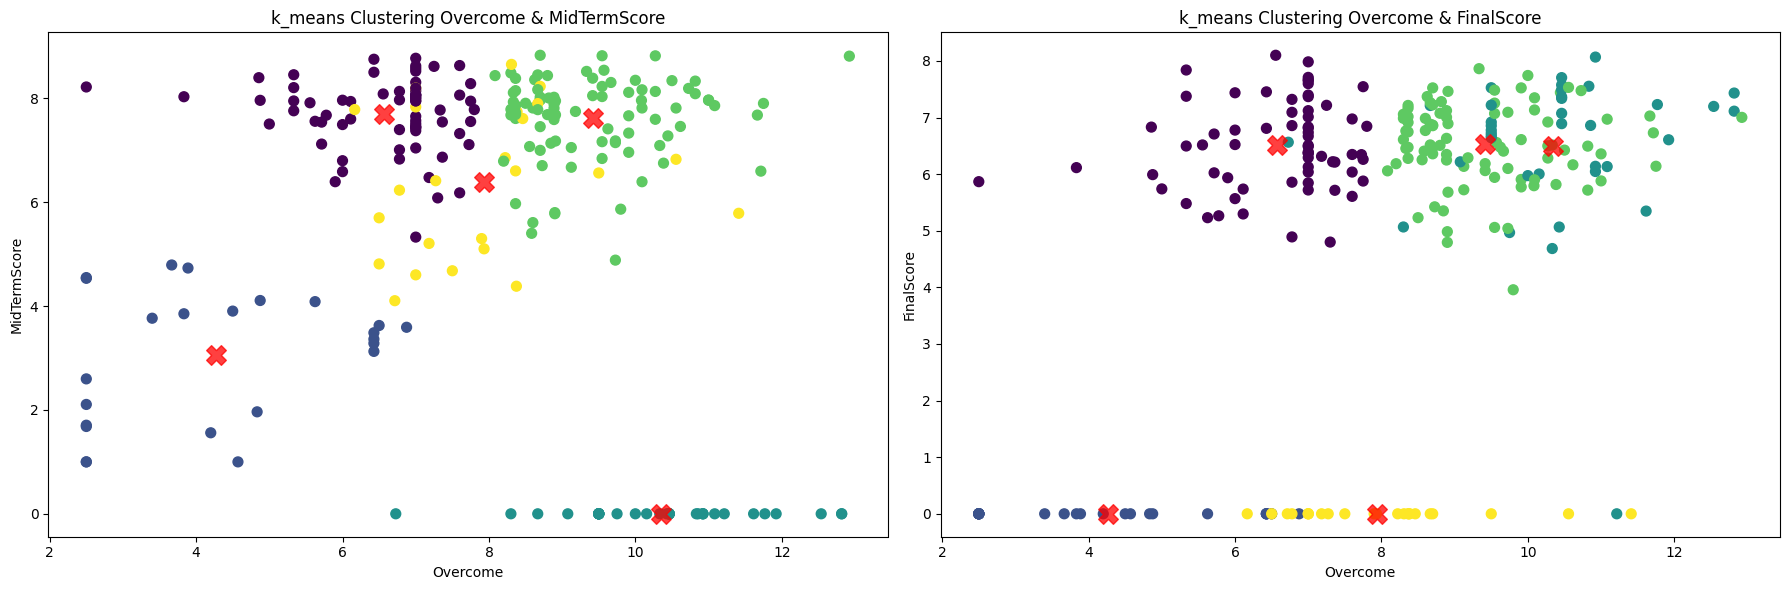

In [120]:
visualize(name_data, 0, data, centroids_final, labels_final, labels_name)

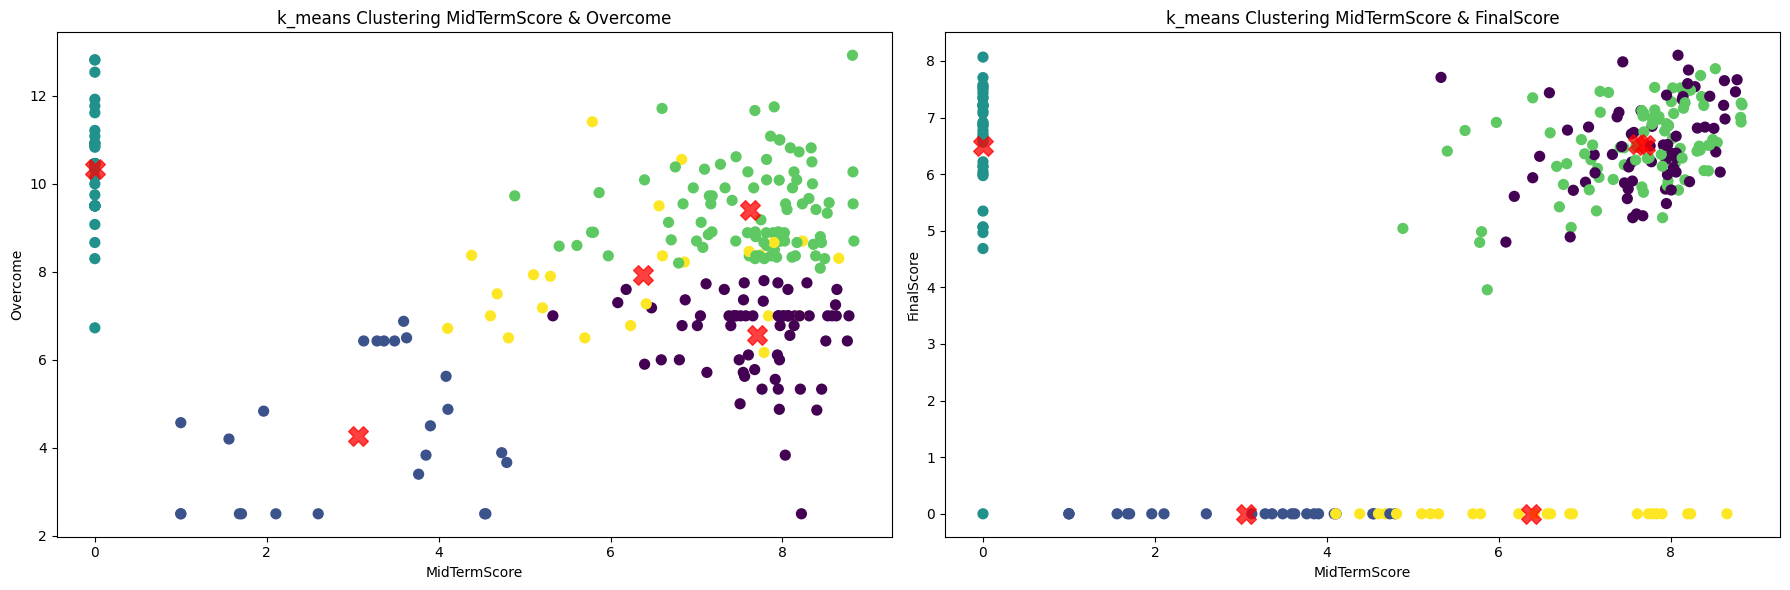

In [121]:
visualize(name_data, 1, data, centroids_final, labels_final, labels_name)

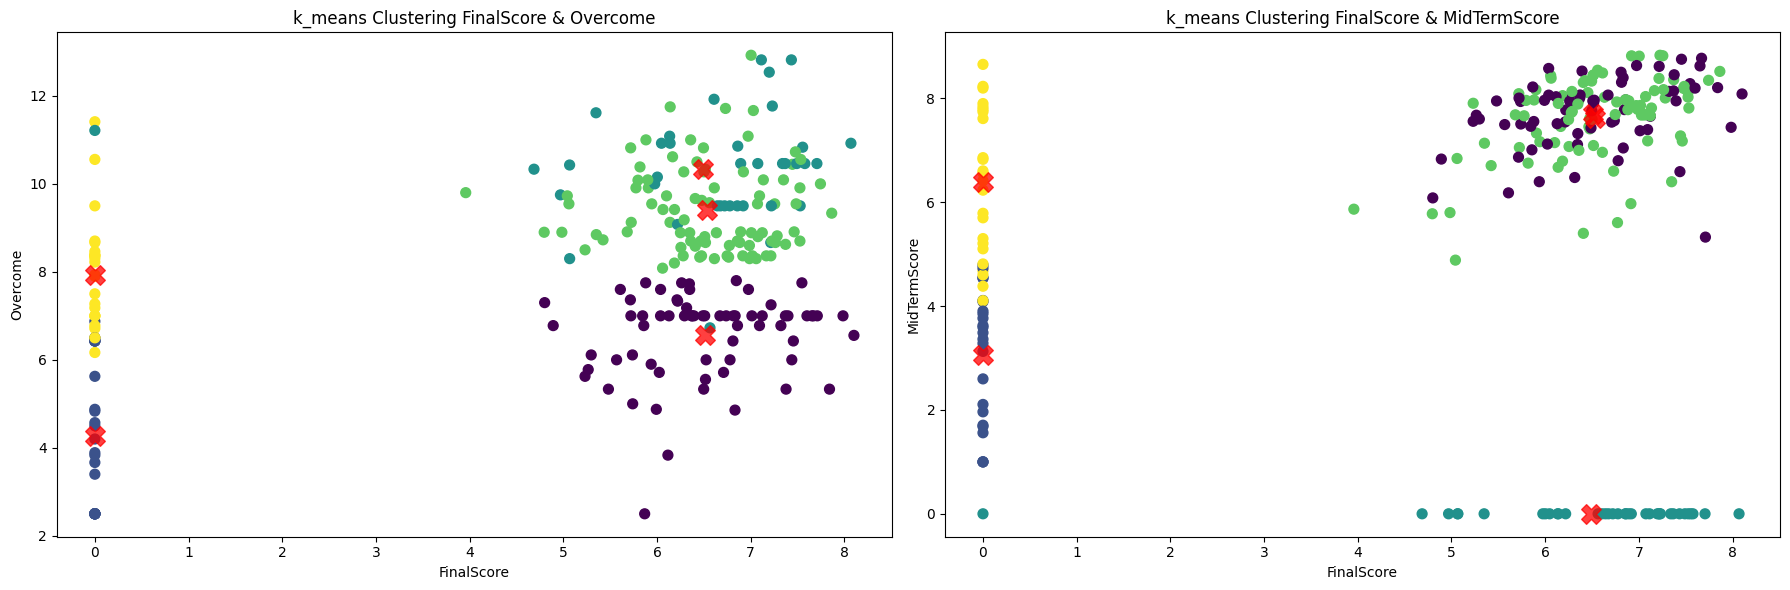

In [122]:
visualize(name_data, 2, data, centroids_final, labels_final, labels_name)

# MajorCourses

In [123]:
name_data = "MajorCourses"
data, (n_samples, n_feature), labels_name = load_file_json(f"../Data/{name_data}.json")
(centroids_final, labels_final), (s_score, d_score) = train(f"{name_data}", data)

0.38059038079548413
0.9462852524610603
[[12.86618192  7.57609283  7.4044538 ]
 [ 3.66888889  1.97501526  1.97121564]
 [16.44263209  7.88164129  7.82643531]
 [14.6017892   4.93043696  1.32256731]
 [ 1.48148148  6.31488665  5.20044844]]
[4 0 2 2 1 0 2 0 2 0 0 4 3 2 0 0 4 0 2 2 0 3 0 3 0 2 4 0 3 2 2 0 0 2 0 0 0
 1 0 2 2 0 2 2 1 2 0 0 0 2 3 2 0 0 0 0 2 0 1 3 0 1 1 1 4 0 0 0 0 0 0 0 2 0
 0 1 0 2 0 0 0 0 0 0 0 2 2 0 3 2 0 2 2 2 0 0 0 0 0 2 1 2 0 0 1 1 2 0 2 0 2
 2 0 0 0 0 0 0 0 2 2 1 2 0 2 0 0 2 0 1 0 0 2 2 2 2 0 2 0 2 0 2 1 0 2 0 0 3
 0 0 0 0 2 0 3 2 0 2 4 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 2 0 2 0 4 0 0 0 0 0 3
 0 2 4 2 0 0 2 0 0 0 2 0 0 0 0 0 2 2 0 2 4 0 2 0 1 0 0 0]


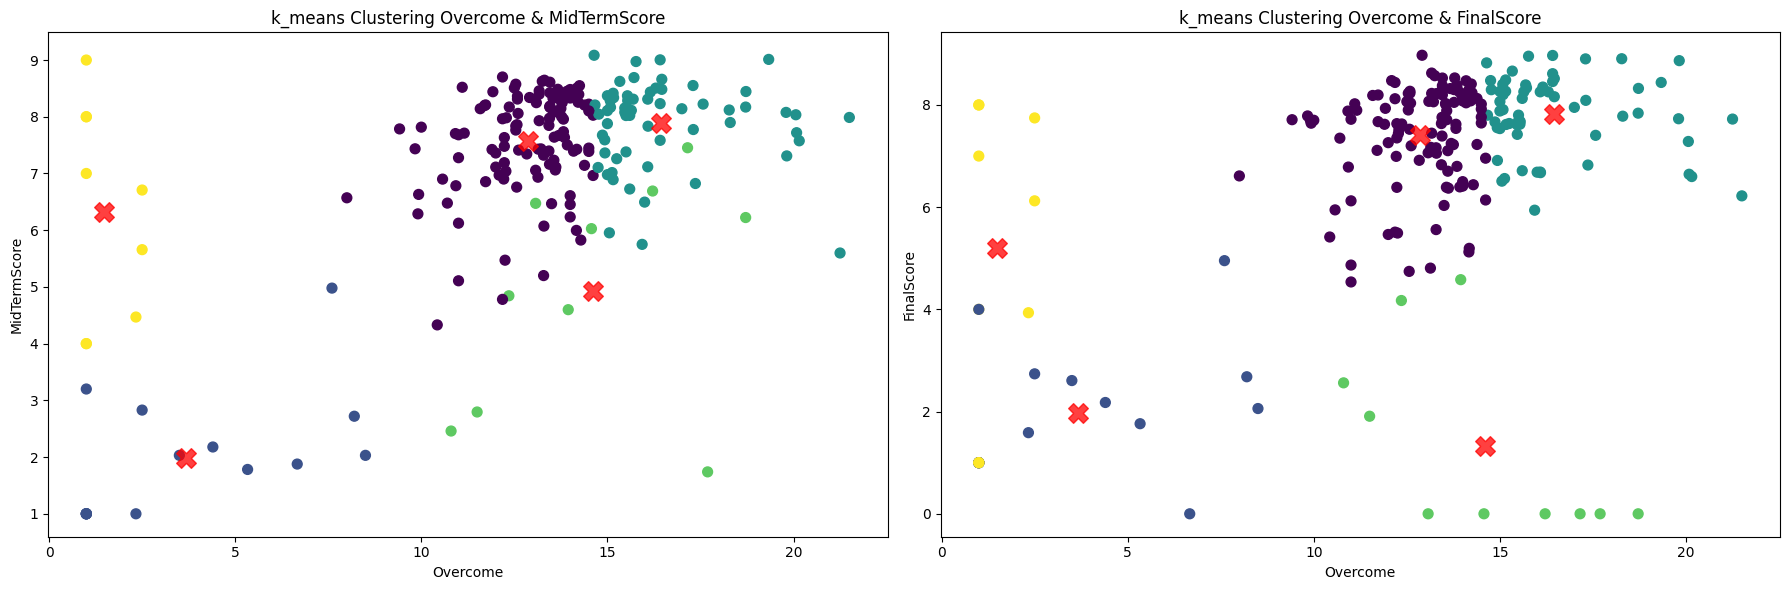

In [124]:
visualize(name_data, 0, data, centroids_final, labels_final, labels_name)

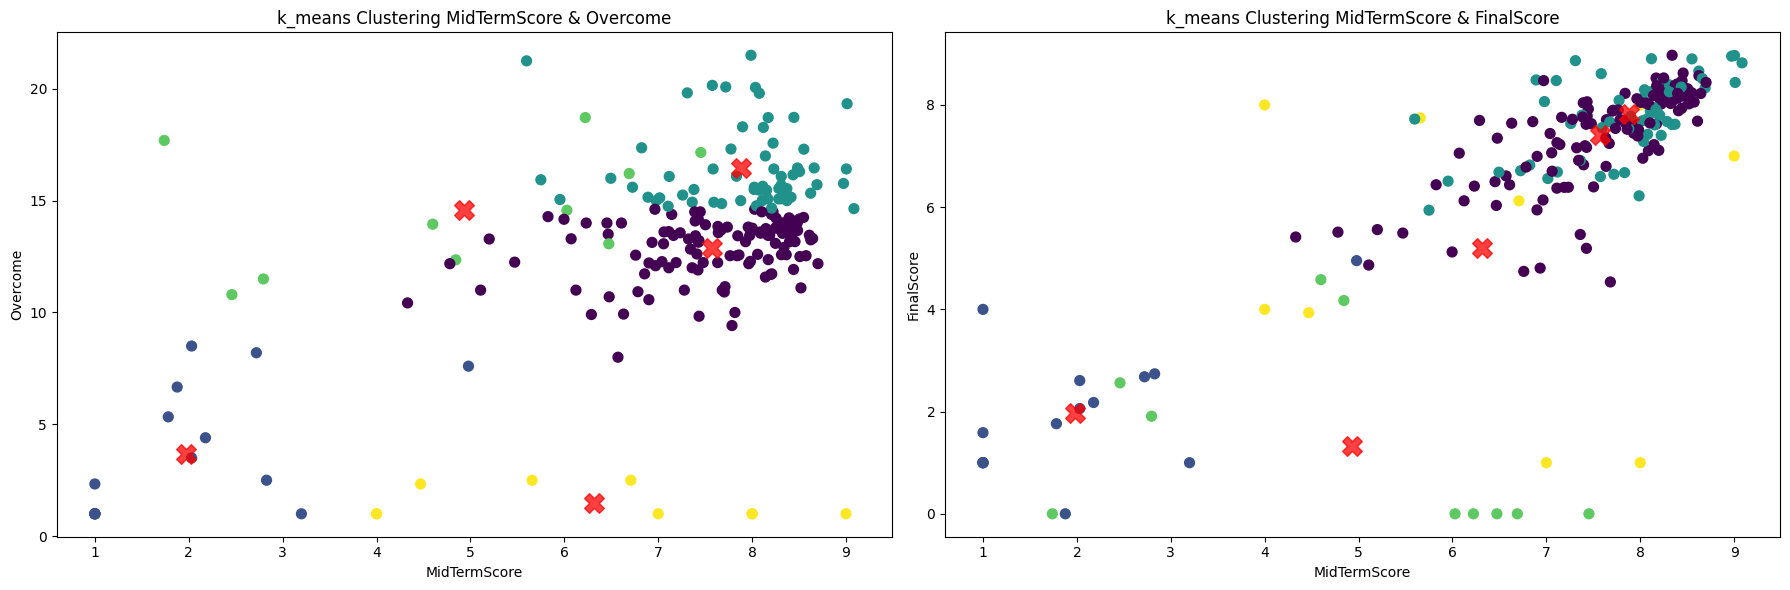

In [125]:
visualize(name_data, 1, data, centroids_final, labels_final, labels_name)

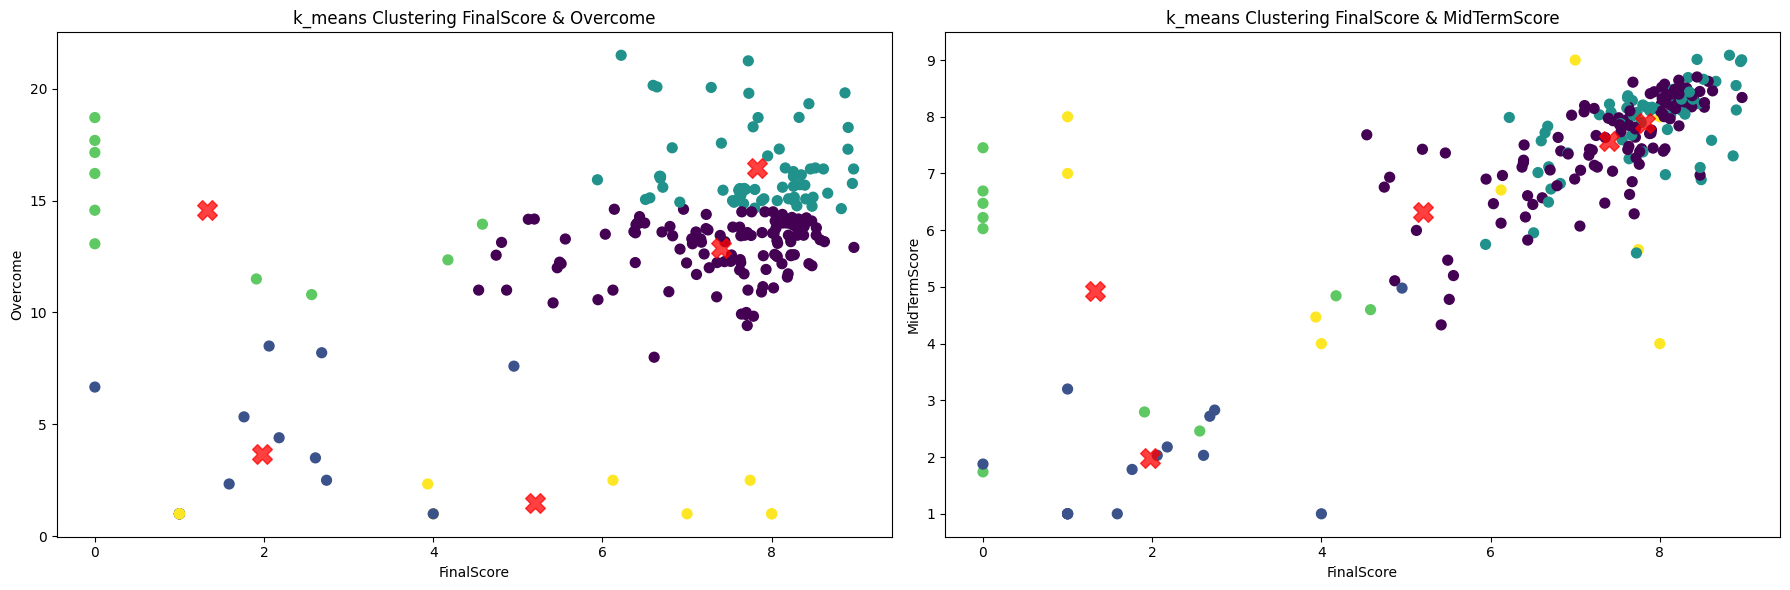

In [126]:
visualize(name_data, 2, data, centroids_final, labels_final, labels_name)